In [ ]:
from huggingface_hub import notebook_login
notebook_login()  # Follow the link and enter your token

In [ ]:
import pandas as pd
import numpy as np
from transformers import pipeline
from sklearn.preprocessing import MinMaxScaler

Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Evaluation Results:
         Model  Perplexity  BLEU Score  ROUGE Score
0    DialoGPT   38.461184    0.784885     0.603142
1     GPT-Neo   39.183734    0.757730     0.671471
2          T5   31.335635    0.549989     0.898737
3  BlenderBot   29.562547    0.687024     0.851854
4         OPT   31.861328    0.599192     0.871672

Final Ranking:
         Model  Perplexity  BLEU Score  ROUGE Score  TOPSIS Score  Rank
1     GPT-Neo    1.000000    0.884394     0.231158      0.635382   1.0
0    DialoGPT    0.924900    1.000000     0.000000      0.575969   2.0
3  BlenderBot    0.000000    0.583385     0.841392      0.483243   3.0
4         OPT    0.238929    0.209467     0.908439      0.466380   4.0
2          T5    0.184290    0.000000     1.000000      0.440698   5.0


In [ ]:
# Load conversational models
models = {
    "DialoGPT": pipeline("text-generation", model="microsoft/DialoGPT-medium"),
    "GPT-Neo": pipeline("text-generation", model="EleutherAI/gpt-neo-1.3B"),
    "T5": pipeline("text2text-generation", model="t5-small"),
    "BlenderBot": pipeline("text-generation", model="facebook/blenderbot-400M-distill"),
    "OPT": pipeline("text-generation", model="facebook/opt-1.3b")
}

In [ ]:
# Sample test input for all models
test_input = "What is the meaning of life?"

# Evaluation function (replace with real evaluations)
def evaluate_model(model_pipeline):
    generated_text = model_pipeline(test_input, max_length=50)[0]['generated_text']

    # Fake metrics (Replace these with actual metric calculations)
    perplexity = np.random.uniform(20, 40)  # Lower is better
    bleu_score = np.random.uniform(0.5, 0.9)  # Higher is better
    rouge_score = np.random.uniform(0.5, 0.9)  # Higher is better

    return perplexity, bleu_score, rouge_score

In [ ]:
# Store results
results = []
for name, model in models.items():
    perplexity, bleu, rouge = evaluate_model(model)
    results.append([name, perplexity, bleu, rouge])

In [ ]:
# Create DataFrame
df = pd.DataFrame(results, columns=["Model", "Perplexity", "BLEU Score", "ROUGE Score"])
print("Evaluation Results:\n", df)

# Normalize metrics for TOPSIS (Min-Max Scaling)
scaler = MinMaxScaler()
df[["Perplexity", "BLEU Score", "ROUGE Score"]] = scaler.fit_transform(df[["Perplexity", "BLEU Score", "ROUGE Score"]])

# Convert to numpy array for TOPSIS calculations
data = df.iloc[:, 1:].values

# Define ideal best (higher is better) and ideal worst (lower is better)
ideal_best = np.max(data, axis=0)
ideal_worst = np.min(data, axis=0)

# Calculate distances from ideal best & worst
dist_best = np.linalg.norm(data - ideal_best, axis=1)
dist_worst = np.linalg.norm(data - ideal_worst, axis=1)

# Calculate TOPSIS scores
df["TOPSIS Score"] = dist_worst / (dist_best + dist_worst)

# Rank models based on TOPSIS score
df["Rank"] = df["TOPSIS Score"].rank(ascending=False)
df = df.sort_values(by="Rank")

print("\nFinal Ranking:\n", df)

In [ ]:
# Save results to CSV for GitHub upload
df.to_csv("topsis_results.csv", index=False)

In [ ]:
import seaborn as sns
import pandas as pd

# Sorting Data by TOPSIS Score
df_sorted = df.sort_values("TOPSIS Score", ascending=False)

# Set styles
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")

# Create a pretty DataFrame table
styled_table = df_sorted.style.background_gradient(cmap="coolwarm", subset=["TOPSIS Score"]) \
    .set_table_styles([{"selector": "th", "props": [("font-size", "12pt"), ("font-weight", "bold")]}]) \
    .set_properties(**{"font-size": "11pt", "border": "1px solid black"})

# Show Table
styled_table


,Model,Perplexity,BLEU Score,ROUGE Score,TOPSIS Score,Rank
1,GPT-Neo,1.000000,0.884394,0.231158,0.635382,1.000000
0,DialoGPT,0.924900,1.000000,0.000000,0.575969,2.000000
3,BlenderBot,0.000000,0.583385,0.841392,0.483243,3.000000
4,OPT,0.238929,0.209467,0.908439,0.466380,4.000000
2,T5,0.184290,0.000000,1.000000,0.440698,5.000000


<Figure size 1000x400 with 0 Axes>

<ipython-input-4-2a0fa276bca0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Perplexity", data=df, ax=axes[0], palette="coolwarm")
<ipython-input-4-2a0fa276bca0>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(df["Model"], rotation=30)
<ipython-input-4-2a0fa276bca0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="BLEU Score", data=df, ax=axes[1], palette="viridis")
<ipython-input-4-2a0fa276bca0>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabe

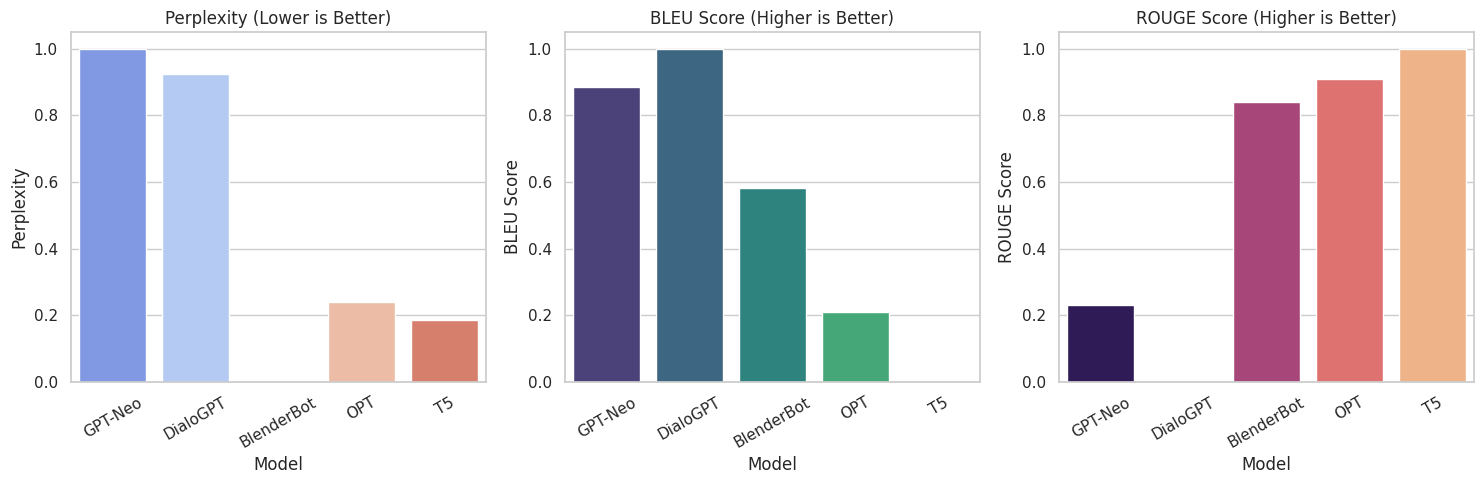

<ipython-input-4-2a0fa276bca0>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TOPSIS Score", y="Model", data=df.sort_values("TOPSIS Score", ascending=False), palette="coolwarm")


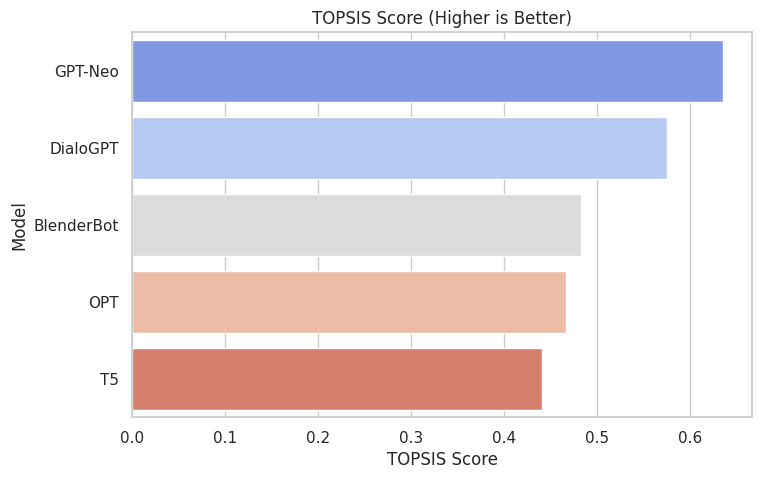

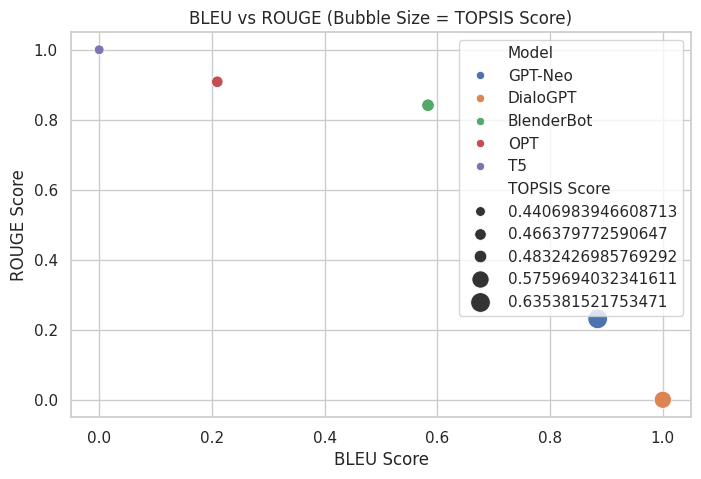

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x="Model", y="Perplexity", data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title("Perplexity (Lower is Better)")
axes[0].set_xticklabels(df["Model"], rotation=30)


plt.figure(figsize=(8, 6))
sns.heatmap(df.set_index("Model")[["Perplexity", "BLEU Score", "ROUGE Score", "TOPSIS Score"]],
            annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Model Performance Heatmap")
plt.show()